## Download 151 Pokemon to a a CSV File

In [209]:
import requests
import pandas as pd

In [210]:
# Funtion to GET generation 1 pokemon data from api and save to CSV file at path ./data/pokemon.csv. Store all battle stats in a dataframe.

def get_pokemon_data():
    # Get data from api
    url = 'https://pokeapi.co/api/v2/pokemon?limit=1281'
    response = requests.get(url)
    data = response.json()
    pokemon = data['results']
    
    # Create dataframe to store data
    df = pd.DataFrame(columns=['name', 'id', 'type1', 'type2', 'hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed'])
    
    # Loop through each pokemon and get data
    for i in range(len(pokemon)):
        pokemon_url = pokemon[i]['url']
        pokemon_response = requests.get(pokemon_url)
        pokemon_data = pokemon_response.json()
        
        # Get name
        name = pokemon_data['name']
        
        # Get id
        id = pokemon_data['id']
        
        # Get types
        types = pokemon_data['types']
        type1 = types[0]['type']['name']
        if len(types) == 2:
            type2 = types[1]['type']['name']
        else:
            type2 = None
        
        # Get stats
        stats = pokemon_data['stats']
        hp = stats[0]['base_stat']
        attack = stats[1]['base_stat']
        defense = stats[2]['base_stat']
        special_attack = stats[3]['base_stat']
        special_defense = stats[4]['base_stat']
        speed = stats[5]['base_stat']
        
        # concat data to dataframe
        df = pd.concat([df, pd.DataFrame([[name, id, type1, type2, hp, attack, defense, special_attack, special_defense, speed]], columns=['name', 'id', 'type1', 'type2', 'hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed'])])
    
    # Save dataframe to CSV file
    df.to_csv('./data/pokemon.csv', index=False)

# Run function to get data and save to CSV file
# get_pokemon_data()

## Load Pokemon CSV into Pandas DataFrame?

In [211]:
# Load Pokemon csv file into a dataframe
poke_df = pd.read_csv('./data/pokemon.csv')

poke_df.head()

,name,id,type1,type2,hp,attack,defense,special_attack,special_defense,speed
0,bulbasaur,1,grass,poison,45,49,49,65,65,45
1,ivysaur,2,grass,poison,60,62,63,80,80,60
2,venusaur,3,grass,poison,80,82,83,100,100,80
3,charmander,4,fire,NaN,39,52,43,60,50,65
4,charmeleon,5,fire,NaN,58,64,58,80,65,80


In [212]:
# provide basic stats on the data
poke_df.describe()

,id,hp,attack,defense,special_attack,special_defense,speed
count,1281.00000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000
mean,2542.86573,70.979703,81.444965,74.857923,73.355191,72.683841,70.939891
std,3943.40589,26.807291,31.828868,30.441775,32.444320,27.417389,30.357922
min,1.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,321.00000,53.000000,57.000000,52.000000,50.000000,51.000000,47.000000
50%,641.00000,70.000000,80.000000,70.000000,65.000000,70.000000,70.000000
75%,961.00000,85.000000,100.000000,92.000000,95.000000,90.000000,92.000000
max,10271.00000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


In [213]:
# add a cvolumn to poke_df called "total_stats" that sums the Attack, Defense, Sp. Atk, Sp. Def, and Speed columns
poke_df['total_stats'] = poke_df['attack'] + poke_df['defense'] + poke_df['special_attack'] + poke_df['special_defense'] + poke_df['speed']

poke_df


,name,id,type1,type2,hp,attack,defense,special_attack,special_defense,speed,total_stats
0,bulbasaur,1,grass,poison,45,49,49,65,65,45,273
1,ivysaur,2,grass,poison,60,62,63,80,80,60,345
2,venusaur,3,grass,poison,80,82,83,100,100,80,445
3,charmander,4,fire,NaN,39,52,43,60,50,65,270
4,charmeleon,5,fire,NaN,58,64,58,80,65,80,347
...,...,...,...,...,...,...,...,...,...,...,...
1276,koraidon-gliding-build,10267,fighting,dragon,100,135,115,85,100,135,570
1277,miraidon-low-power-mode,10268,electric,dragon,100,85,100,135,115,135,570
1278,miraidon-drive-mode,10269,electric,dragon,100,85,100,135,115,135,570
1279,miraidon-aquatic-mode,10270,electric,dragon,100,85,100,135,115,135,570


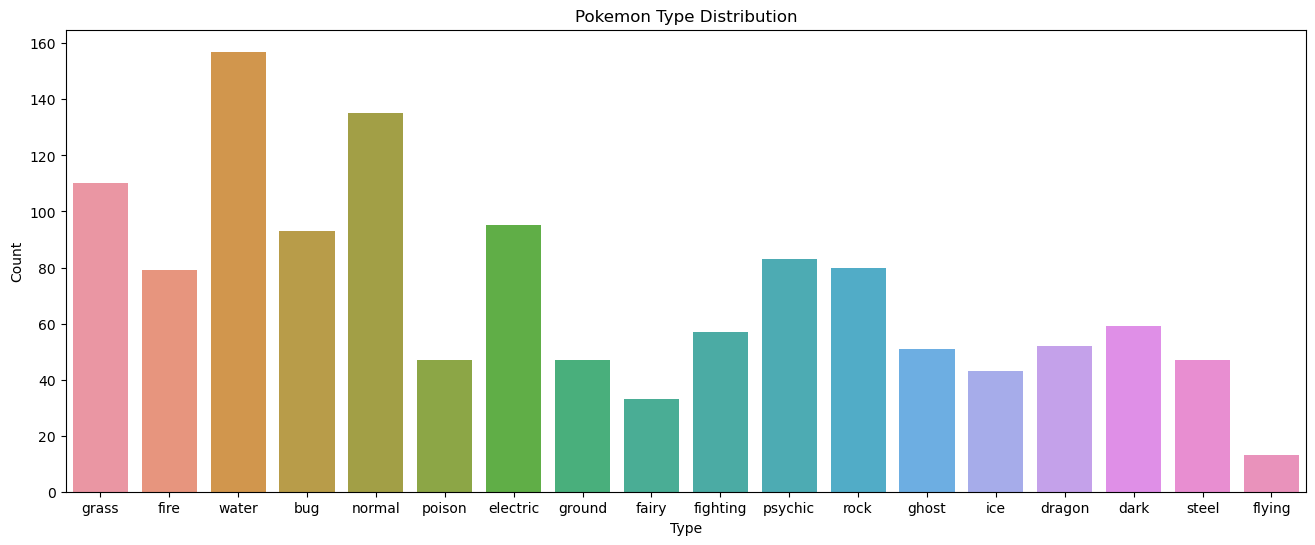

In [214]:
#import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Data visualization that shows the distribution of the pokemon types
plt.figure(figsize=(16, 6))
sns.countplot(x='type1', data=poke_df)
plt.title('Pokemon Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


In [215]:
normal_set = None
fire_set = None
water_set = None
electric_set = None
grass_set = None
ice_set = None
fighting_set = None
poison_set = None
ground_set = None
flying_set = None
psychic_set = None
bug_set = None
rock_set = None
ghost_set = None
dark_set = None
dragon_set = None
steel_set = None
fairy_set = None



# an array of all pokemon types
types = ['normal', 'fire', 'water', 'electric', 'grass', 'ice', 'fighting', 'poison', 'ground', 'flying', 'psychic', 'bug', 'rock', 'ghost', 'dark', 'dragon', 'steel', 'fairy']


print("All type sub-dataframes:")

# For each type, create a dataframe with only pokemon of that type
for type in types:
    # Create a new dataframe for each type that only contains pokemon of that type in either type1 or type2
    globals()[type + '_set'] = {
        # 
        "common_type": type,
        # globals() is a dictionary of all global variables in the current scope (i.e. the scope of this for loop)
            # globals()[type + '_df'] creates a new variable with the name of the type and the suffix '_df'
        "pokemon": poke_df[(poke_df['type1'] == type) | (poke_df['type2'] == type)]
    }
    
    # For ease of use, will print all available dataframe names
    print('\t' +type + '_set')


All type sub-dataframes:
	normal_set
	fire_set
	water_set
	electric_set
	grass_set
	ice_set
	fighting_set
	poison_set
	ground_set
	flying_set
	psychic_set
	bug_set
	rock_set
	ghost_set
	dark_set
	dragon_set
	steel_set
	fairy_set


In [216]:
# Test to display the first 5 rows of the dataframe for a set
test_set = grass_set['pokemon']
test_set.head()

,name,id,type1,type2,hp,attack,defense,special_attack,special_defense,speed,total_stats
0,bulbasaur,1,grass,poison,45,49,49,65,65,45,273
1,ivysaur,2,grass,poison,60,62,63,80,80,60,345
2,venusaur,3,grass,poison,80,82,83,100,100,80,445
42,oddish,43,grass,poison,45,50,55,75,65,30,275
43,gloom,44,grass,poison,60,65,70,85,75,40,335


In [217]:
# Display details
test_set.describe()

,id,hp,attack,defense,special_attack,special_defense,speed,total_stats
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,1984.972222,67.159722,77.270833,73.618056,72.708333,72.854167,62.319444,358.770833
std,3475.481249,19.934741,28.683764,23.926167,25.035883,22.316217,28.281960,91.460467
min,1.000000,30.000000,27.000000,30.000000,24.000000,30.000000,10.000000,150.000000
25%,327.000000,50.000000,55.000000,55.000000,54.750000,55.000000,40.000000,273.750000
50%,594.000000,65.500000,75.000000,70.000000,70.000000,73.500000,60.000000,375.000000
75%,906.250000,80.000000,100.000000,88.500000,90.000000,87.000000,80.000000,430.000000
max,10244.000000,123.000000,181.000000,131.000000,145.000000,135.000000,150.000000,560.000000


In [233]:
# Function to create a data visualization to show overlapping barchart for the quartiles for 'stat' for each type-set in toCompare
def compare_quartiles(stat = 'attack'):
    
    # Stores all dictionaries of pokemon type-sets and their respective dataframes
    allSets = [
        normal_set['pokemon'][stat],
        fire_set['pokemon'][stat],
        water_set['pokemon'][stat],
        grass_set['pokemon'][stat],
        electric_set['pokemon'][stat],
        ice_set['pokemon'][stat],
        fighting_set['pokemon'][stat],
        poison_set['pokemon'][stat],
        ground_set['pokemon'][stat],
        flying_set['pokemon'][stat],
        psychic_set['pokemon'][stat],
        bug_set['pokemon'][stat],
        rock_set['pokemon'][stat],
        ghost_set['pokemon'][stat],
        dragon_set['pokemon'][stat],
        dark_set['pokemon'][stat],
        steel_set['pokemon'][stat],
        fairy_set['pokemon'][stat]
    ]

    print(len(allSets))
    
    plt.figure(figsize=(16, 6))
    sns.boxplot(data=allSets, palette='Set2')
    plt.title(f'{stat} Quartiles')
    plt.xlabel('Type')
    plt.ylabel(stat)
    
    
    
    allLabels = [
        normal_set['common_type'],
        fire_set['common_type'],
        water_set['common_type'],
        grass_set['common_type'],
        electric_set['common_type'],
        ice_set['common_type'],
        fighting_set['common_type'],
        poison_set['common_type'],
        ground_set['common_type'],
        flying_set['common_type'],
        psychic_set['common_type'],
        bug_set['common_type'],
        rock_set['common_type'],
        ghost_set['common_type'],
        dragon_set['common_type'],
        dark_set['common_type'],
        steel_set['common_type'],
        fairy_set['common_type']
    ]
    print(len(allLabels))
    
    plt.xticks(range(len(allLabels)), allLabels, rotation=45)
    plt.show()

### All Types that can be compared with `compare_quartiles`

- hp
- attack
- defense
- special_attack
- special_defense
- speed
- total_stats

18
18


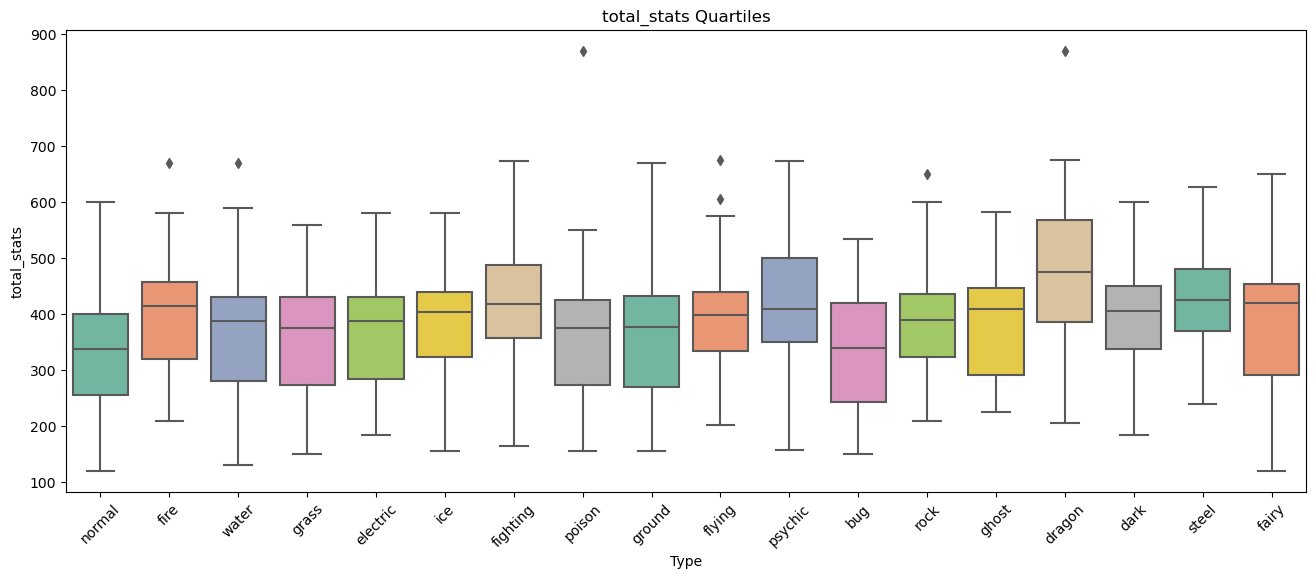

In [234]:
# take user input and store in a vairable called statToCompare
# statToCompare = input('Which stat do you want to compare? ')

compare_quartiles('total_stats')

In [220]:
pikachu = poke_df[poke_df['name'] == 'pikachu'].drop(['id', 'type1', 'type2', 'total_stats'], axis=1)

pikachu_data = pikachu[pikachu['name'] == 'pikachu'].iloc[0]

pikachu_data['hp']


35

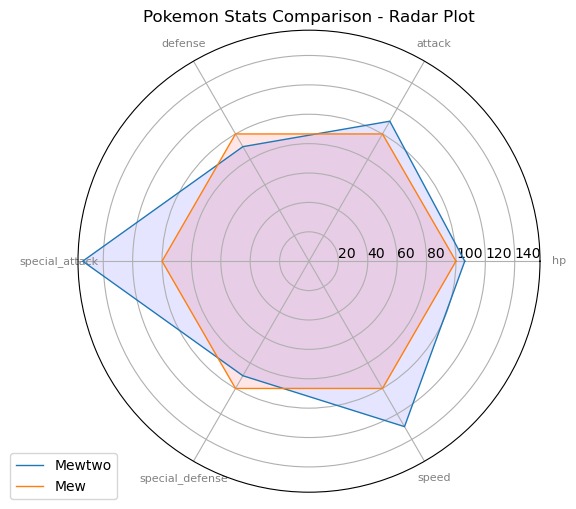

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# Compare the stats of two Pokémon
def radar_plot(pokemon1='pikachu', pokemon2='charmander', pokeDF=poke_df):
    
    # Check if the Pokémon exist in the DataFrame
    if pokemon1 not in pokeDF['name'].values:
        print(f"No data available for Pokémon: {pokemon1}")
        return
    if pokemon2 not in pokeDF['name'].values:
        print(f"No data available for Pokémon: {pokemon2}")
        return
    
    # Store the data for pokemon1 in a variable
    pokemon1_data = pokeDF[pokeDF['name'] == pokemon1].iloc[0]
    # Store the data for pokemon2 in a variable
    pokemon2_data = pokeDF[pokeDF['name'] == pokemon2].iloc[0]
    
    # Create a dataframe with only the stats for pokemon1 and pokemon2
    data = {
        "group": [pokemon1, pokemon2],
        "hp": [pokemon1_data['hp'], pokemon2_data['hp']],
        "attack": [pokemon1_data['attack'], pokemon2_data['attack']],
        "defense": [pokemon1_data['defense'], pokemon2_data['defense']],
        "special_attack": [pokemon1_data['special_attack'], pokemon2_data['special_attack']],
        "special_defense": [pokemon1_data['special_defense'], pokemon2_data['special_defense']],
        "speed": [pokemon1_data['speed'], pokemon2_data['speed']]
    }
    
    # Convert the data to a dataframe
    df = pd.DataFrame(data)
    
    # Number of variables
    categories = list(df)[1:]
    N = len(categories)
    
    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values_pokemon1 = df.loc[0].drop('group').values.flatten().tolist()
    values_pokemon1 += values_pokemon1[:1]
    values_pokemon2 = df.loc[1].drop('group').values.flatten().tolist()
    values_pokemon2 += values_pokemon2[:1]
    
    # What will be the angle of each axis in the plot?
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the spider plot
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)

    # Draw one axis per variable + add labels
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)

    # Plot data
    ax.plot(angles, values_pokemon1, linewidth=1, linestyle='solid', label=pokemon1.capitalize())
    ax.fill(angles, values_pokemon1, 'b', alpha=0.1)
    ax.plot(angles, values_pokemon2, linewidth=1, linestyle='solid', label=pokemon2.capitalize())
    ax.fill(angles, values_pokemon2, 'r', alpha=0.1)

    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.title('Pokemon Stats Comparison - Radar Plot')
    plt.show()

radar_plot('mewtwo', 'mew')